In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [13]:
X,Y = make_blobs(n_samples=500,centers=5,random_state=20)
print(X.shape)

(500, 2)


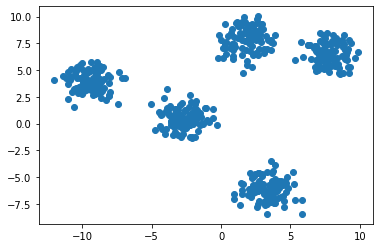

In [16]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [29]:
k = 5
colors = ['red','green','blue','pink','orange']

# Dictionary 
clusters = {}

#Init Cluster Centers
for i in range(k):
    center = 10*(2*np.random.random((2,))-1)
    cluster = {
        'center' :center,
        'points':[],
        'color':colors[i]
    }
    clusters[i] = cluster
print(clusters)

{0: {'center': array([-5.98844256,  0.5213832 ]), 'points': [], 'color': 'red'}, 1: {'center': array([-6.5730437 , -1.69433011]), 'points': [], 'color': 'green'}, 2: {'center': array([9.04141778, 4.00619245]), 'points': [], 'color': 'blue'}, 3: {'center': array([ 8.8565365 , -4.89270868]), 'points': [], 'color': 'pink'}, 4: {'center': array([-4.31787397,  6.16059319]), 'points': [], 'color': 'orange'}}


In [30]:
clusters[0]

{'center': array([-5.98844256,  0.5213832 ]), 'points': [], 'color': 'red'}

In [31]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [33]:
# 1. Step - Assign Each Point to One of the Cluster based upon distance
def assignPointToCluster(clusters):
    
    m = X.shape[0]
    #For Every Point
    for i in range(m):
        current_x = X[i]
        dist = []
        #For Every Cluster Center find the one nearest to the current point
        for j in range(k):
            cc = clusters[j]['center']
            d = distance(current_x,cc)
            dist.append(d)
        nearest = np.argmin(dist)
        clusters[nearest]['points'].append(current_x)
        
        
        

In [35]:
assignPointToCluster(clusters)

In [40]:
#print(np.array(clusters[0]['points']))

In [42]:
# Update Cluster Centers based upon mean of the points assigned to the cluster
def updateClusterCenters(clusters):
    for i in range(k):
        pts = np.array(clusters[i]['points'])
        if pts.shape[0]>0:
            u = pts.mean(axis=0)
            clusters[i]['center'] = u
            clusters[i]['points'] = []
        

In [43]:
def plotClusters(clusters):
    for i in range(k):
        #Get all the points assigned
        pts = np.array(clusters[i]['points'])
        ui = clusters[i]['center']
        if pts.shape[0]>0:
            clr = clusters[i]['color']
            plt.scatter(pts[:,0],pts[:,1],c=clr)
        #Plot cluster center
        plt.scatter(ui[0],ui[1],color='black',marker='*')
        
        
        

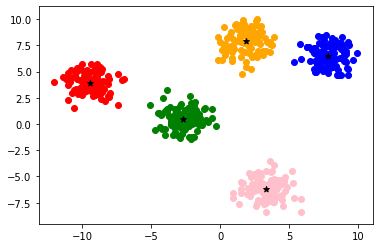

In [51]:
# Repeat 
assignPointToCluster(clusters)
plotClusters(clusters)
updateClusterCenters(clusters)


In [21]:
from sklearn.cluster import KMeans

In [22]:
km = KMeans(n_clusters=5)

In [23]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
centers = km.cluster_centers_

In [ ]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(centers[:,0],centers[:,1])

# Color Extraction

In [25]:
import cv2
img = cv2.imread('horse.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

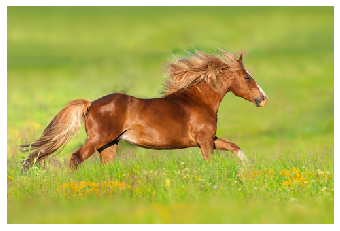

In [26]:
plt.imshow(img)
plt.axis("off")
plt.show()

In [27]:
X = img.reshape((-1,3))
print(X.shape)

(166500, 3)


In [28]:
km = KMeans(n_clusters=10)
km.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
centers = np.round(km.cluster_centers_)

In [31]:
centers

array([[140., 164.,  59.],
       [162., 177.,  65.],
       [ 96.,  47.,  20.],
       [181., 111.,  59.],
       [204., 149.,  95.],
       [177., 186.,  76.],
       [177., 184.,  40.],
       [195., 201.,  96.],
       [233., 195., 142.],
       [145.,  76.,  32.]])

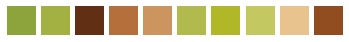

In [32]:
colors = []

for i,color in enumerate(centers):
    plt.subplot(1,10,i+1)
    m = np.zeros((100,100,3),dtype='uint8')
    m[:,:,:] = color
    plt.imshow(m)
    plt.axis("off")
plt.show()

In [40]:
# Try to plot the image
new_img = np.zeros((608*1080,3),dtype='uint8')
print(new_img.shape)

(656640, 3)


In [41]:
#centers[1]  = np.array([0,255,0])
zero_out = [0,1,5,6,7]
for i in zero_out:
    centers[i] = np.array([0,0,0])

In [42]:
new_img = centers[km.labels_]

In [43]:
new_img = new_img.reshape(img.shape)

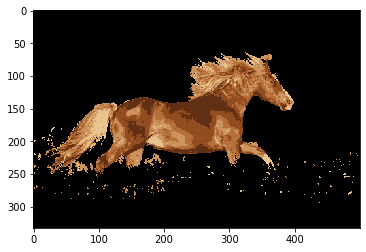

In [44]:
plt.imshow(new_img/255.0)
plt.show()

In [181]:
centers[km.labels_].shape

(166500, 3)

In [45]:
new_img[new_img[:,:,:]>0] = 1

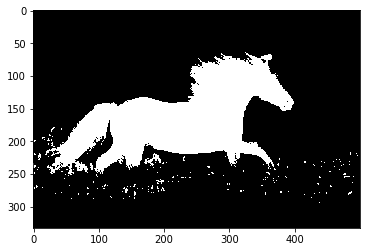

In [47]:
plt.imshow(new_img)

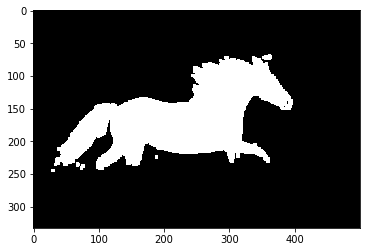

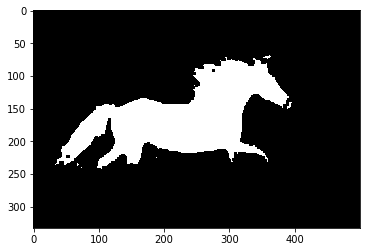

In [61]:
kernel = np.ones((5,5),np.uint8)
cleaned_mask = cv2.morphologyEx(new_img, cv2.MORPH_OPEN, kernel)
plt.imshow(cleaned_mask)
plt.show()

erosion = cv2.erode(new_img,kernel,iterations = 1)
plt.imshow(erosion)
plt.show()

In [ ]:
# Remove Noise using 

In [212]:
final_img = img
final_img[new_img[:,:,:]==0] = 255

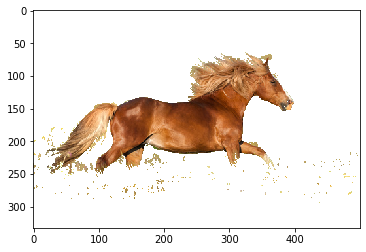

In [213]:
plt.imshow(final_img)

In [214]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(final_img,kernel,iterations = 1)

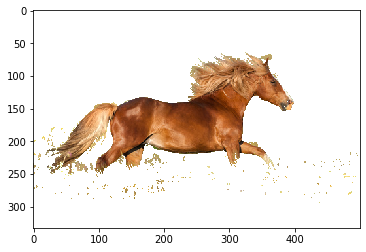

In [219]:
plt.imshow(final_img)
plt.imsave("SEGMENTED.jpg",final_img)

In [216]:
final_img2 = cv2.morphologyEx(final_img, cv2.MORPH_OPEN, kernel)

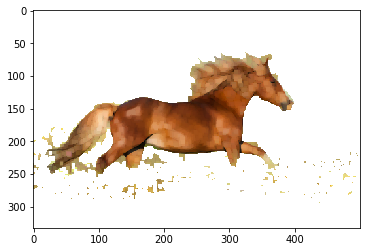